# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [11]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [12]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics();

Loading Data from ../Data/BigAnalysis
---- Dataset Label Distribution ----
	Negative Samples: 7720
	False Positive Samples: 271
	Positive Samples: 1273

---- Well Content Distribution: ----
	Data Wells: 7828
	Blank Wells: 452
	Control Wells: 984


[7720, 271, 1273, 452, 984, 7828]

## Unsupervised - Raw Data
### KMeans

In [ ]:
### KMeans
from Models import KMeansModel

ml_quic.add_model(KMeansModel.KMeansModel(), model_name='KMeans', data_type='raw', tag = 'Unsupervised')

### Spectral Clustering

In [ ]:
### Spectral Clustering
from Models import SpectralClustering

ml_quic.add_model(SpectralClustering.SpectralClustering(n_vars=8), model_name='Spectral', data_type='raw', tag = 'Unsupervised')

### Train and Compare Unsupervised Models

c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7991
         pos       0.93      0.47      0.63      1273

    accuracy                           0.92      9264
   macro avg       0.93      0.73      0.79      9264
weighted avg       0.92      0.92      0.91      9264

Spectral:
              precision    recall  f1-score   support

         neg       1.00      0.62      0.77      7991
         pos       0.30      0.99      0.46      1273

    accuracy                           0.67      9264
   macro avg       0.65      0.81      0.61      9264
weighted avg       0.90      0.67      0.72      9264

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.16974169741697417
False Positives Account for 2.63% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 37.69213333333333
Average RAF: 0.028758043466666668
Average MPR: 6.107876125657778
Average MS: 426.

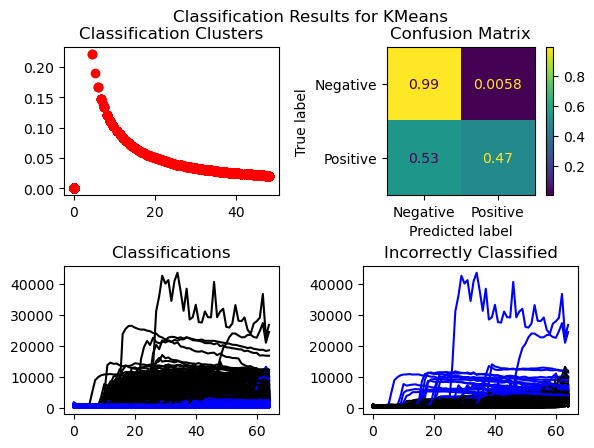

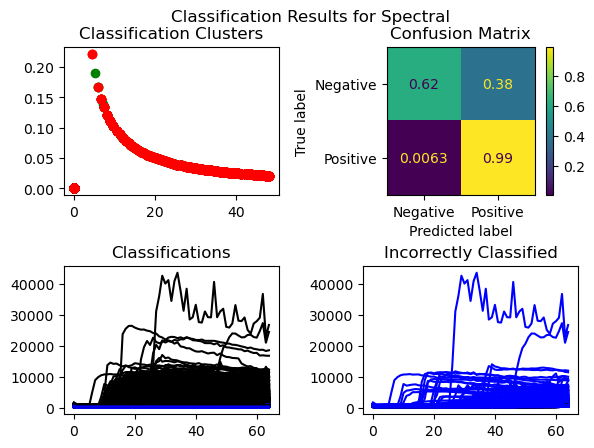

In [ ]:
### Get Unsupervised Scores and Plots
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

## Supervised - Raw Data

### Multilayer Perceptron

In [ ]:
### MLP
from Models import MLP as MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

29/29 [==============================] - 0s 2ms/step
MLP:
              precision    recall  f1-score   support

         neg       1.00      0.96      0.98       801
         pos       0.81      0.99      0.89       125

    accuracy                           0.97       926
   macro avg       0.90      0.98      0.93       926
weighted avg       0.97      0.97      0.97       926

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.97      0.98       801
         pos       0.83      0.94      0.88       125

    accuracy                           0.97       926
   macro avg       0.91      0.96      0.93       926
weighted avg       0.97      0.97      0.97       926

-------- Results on False Positives for MLP --------
29/29 [==============================] - 0s 1ms/step
Accuracy on False Positives: 0.06666666666666667
False Positives Account for 90.32% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.

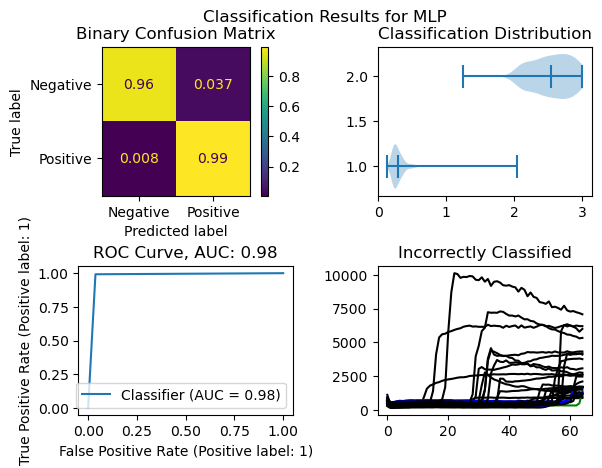

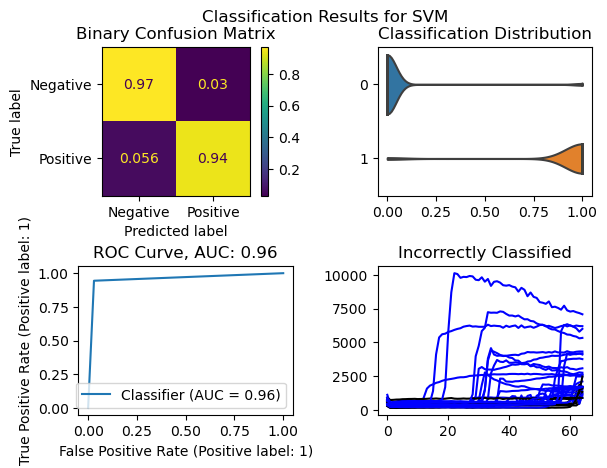

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Timestep')

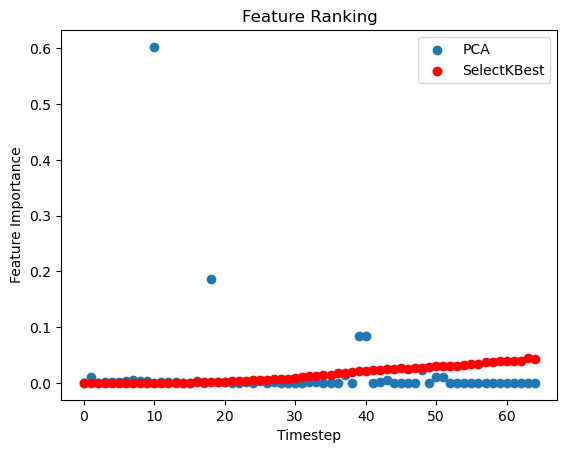

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)), features)
plt.scatter(np.arange(len(features)), skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Timestep')

## Unsupervised - Analysis

### Create New Object

In [ ]:
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [ ]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')

### Add Spectral Clustering

In [ ]:
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_vars=2), model_name='Spectral', data_type='analysis', tag = 'Unsupervised')

### Train and Compare Unsupervised Models

c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans:
              precision    recall  f1-score   support

         neg       0.94      0.99      0.96      7991
         pos       0.87      0.59      0.70      1273

    accuracy                           0.93      9264
   macro avg       0.90      0.79      0.83      9264
weighted avg       0.93      0.93      0.93      9264



c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral:
              precision    recall  f1-score   support

         neg       1.00      0.42      0.59      7991
         pos       0.22      1.00      0.35      1273

    accuracy                           0.50      9264
   macro avg       0.61      0.71      0.47      9264
weighted avg       0.89      0.50      0.56      9264

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.5830258302583026
False Positives Account for 17.80% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.1053982300885
Average RAF: 0.03314652552212389
Average MPR: 8.577633678053099
Average MS: 742.1946902654868
Correctly Classified FP Characteristics:
Average Time to Threshold: 35.58272151898734
Average RAF: 0.03451275073417722
Average MPR: 8.027743369449366
Average MS: 575.868670886076
-------- Results on False Positives for Spectral --------


c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Accuracy on False Positives: 0.0
False Positives Account for 7.05% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.96671586715867
Average RAF: 0.0339430701107011
Average MPR: 8.257033424328414
Average MS: 645.2223247232472
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941086, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 10.765146606306365, Max: 56.55471698
MS:
	Min: 48.75, Average: 841.158483896308, Max: 5967.75


c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


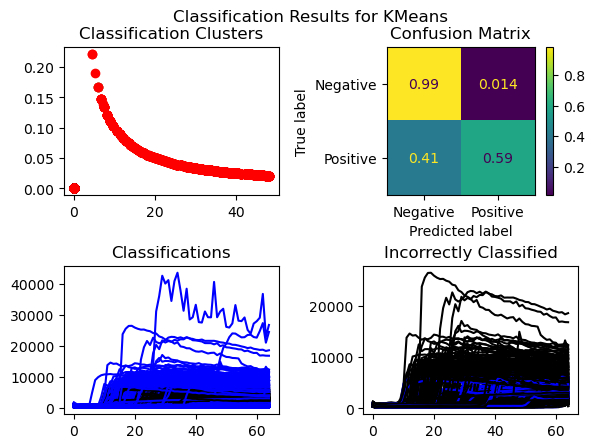

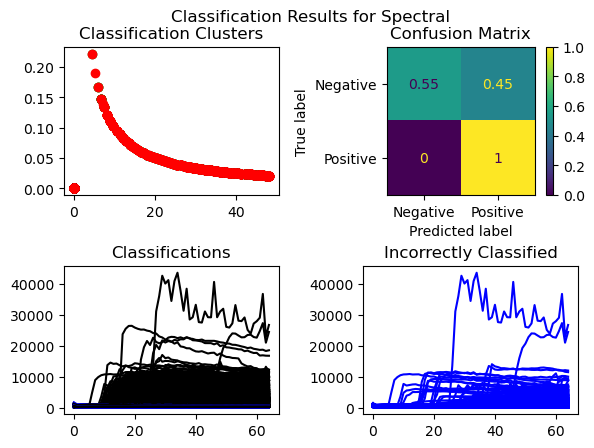

In [ ]:
### Get Unsupervised Scores and Plots
ml_quic.separate_train_test(tags = ['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

### Add Supervised Learning Technique (SVM)

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'analysis', tag = 'Supervised')

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.97      0.98       805
         pos       0.81      0.97      0.88       121

    accuracy                           0.97       926
   macro avg       0.90      0.97      0.93       926
weighted avg       0.97      0.97      0.97       926

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.18181818181818182
False Positives Account for 87.10% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 31.083333333333332
Average RAF: 0.03933684362962962
Average MPR: 7.849651877037037
Average MS: 725.3981481481482
Correctly Classified FP Characteristics:
Average Time to Threshold: 44.25
Average RAF: 0.022742640499999998
Average MPR: 4.1312796665
Average MS: 131.58333333333334
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04

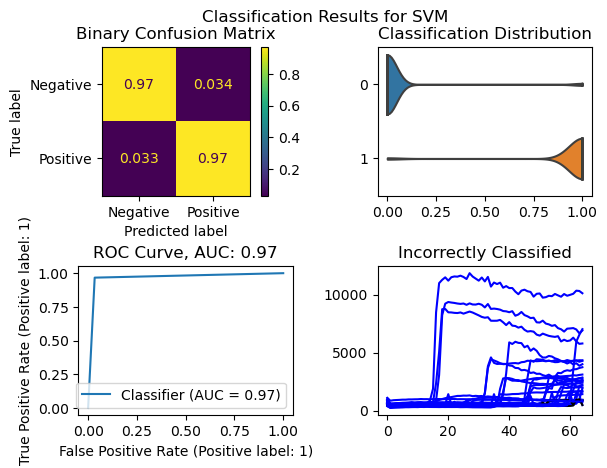

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])